# Project: No-show Appointment Data Analysis
<img src="https://storage.googleapis.com/kaggle-datasets-images/792/1472/8853c0b4591bba14e29305fcaa29f2f9/dataset-cover.jpg">

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis would be done using the [No-show appointment Dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv), one of [Udacity's curated datasets](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf), it is a dataset that contains obersevation of patient that Did not show up for their Medical Appointment, and features that we could analysis to see patterns and suggest reasons why it is so, these columns names or features include (as given on [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments) and on [Udacity's datasets option list](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)): 

> 1. PatientId - Identification of a patient.
> 2. AppointmentID - Identification of each appointment.
> 3. Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
> 4. ScheduledDay - day the patient set up their appointment.
> 5. AppointmentDay - The day of the actuall appointment, when they have to visit the doctor.
> 6. Age - How old is the patient.
> 7. Neighbourhood - Where the appointment takes place (Location of the Hospital).
> 8. Scholarship - True of False . Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
> 9. Hipertension - 1 (True) or 0 (False).
> 10. Diabetes - 1 (True) or 0 (False).
> 11. Alcoholism - 1 (True) or 0 (False).
> 12. Handcap - 1 (True) or 0 (False).
> 13. SMS_received - 1 or more messages sent to the patient.
> 14. No-show - No (if the patient showed up to their appointment) and Yes (if they did not show up).


### Questions

There are questions i'll like to find answers to using this dataset. I have studied the dataset
and i'll like to give answer to the following question;

>1. <a href="#question_1">How many percent of patients miss their scheduled appointments?</a>
>2. <a href="#question_2">What are the age group of people who mostly miss their scheduled appointments</a>
>3. <a href="#question_3">What day of the week do patient mostly misses their scheduled appointments?</a>
>4. <a href="#question_4">What is the probabily that those that have the brazil Scholarship to miss their appointment?</a>
>5. <a href="#question_5">How many of those with Hipertension miss their scheduled appointments?</a>
>6. <a href="#question_6">How many of those with Diabetes miss their scheduled appointments?</a>
>7. <a href="#question_7">How many of those with Alcoholism miss their scheduled appointments?</a>
>8. <a href="#question_8">What is the chance of those who recieved an SMS reminder to miss their scheduled appointments?</a>


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

>This section of the report, involve loading in the data, checking for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# read data and parse the ScheduledDay, AppointmentDay as dates
df = pd.read_csv("./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv", parse_dates = ["ScheduledDay","AppointmentDay"])

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking for number of non-empty values in each variables and their data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
# Check for Unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

>This section of the report, involve loading in the data, checking for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [6]:
# checking for duplicate
df.duplicated().sum()

0

In [7]:
# since the .duplicated method only returns True is all feature in an observation is identical with another
# i'll apply the method on the AppointmentID since it a feature of unique values
df["AppointmentID"].duplicated().sum()

0

In [8]:
df["PatientId"].duplicated().sum()

48228

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There seem to be a problem in the Age values, a minimum value of -1, It obviously an outlier.
let visualize this to see other outliers.


**Age Box Plot**
<a id="age_box_plot"></a>

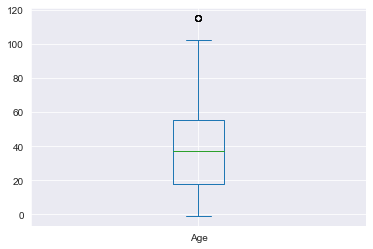

In [10]:
df["Age"].plot(kind="box");

>This visual shows some extreme values, but shows one outlier which is the maximuim value **115**, the age could be a real age, because it is possible one live that long. But **-1** is not possible.
>
>More investigation would be needed to know if
>* The patient was a new born baby at that time and has not reached the age of 1.
>* It was an error.
>
>Either the case, i'll remove it, since i don't have access to the primary source.

**Obeservations**

* The `PatientId` and `AppointmentID` feature contains unique id's and should be seen as string instead od float and int as it is above.
* **48228** Patient had visited the hospital more than once, these people are likely to be those returning patient of the hospital, not nessesarily those that missed an appointment and re-scheduled another.
* There are no missing values.
* There are **81** Hospitals recoded in this dataset.
* The `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `SMS_received` were parsed as integers but should be strings because they are categorical variables.
* The `ScheduledDay` and `AppointmentDay` are parsed as datetime, so seperating the **Date, Month, Day_hour, Week_Day**, this will help us to know is appointment miss rate among those sheduled on weekdays and weekends.
* Gender are encoded as M and F, but for better understanding i'll change them to M - Male and F - Female
* For the `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, ~`Handcap`~, `SMS_received` would be recoded as 1 = "Yes", 0 = "No"



### Data Cleaning (Change Data types to it approprate type and for the Gender match M-male, F-female)

In [11]:
# Remove the Observation with the Age of -1 

In [12]:
df.drop(df.query("Age == -1").index, inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# This function will convert an featues from one data type to another

def convert_type(features: list, type_to: str):
    for feature in features:
        df[f"{feature}"] = df[f"{feature}"].astype(type_to)

**Converting Data Types**

In [15]:
# convert PatientId, AppointmentID, Scholarship, Hipertension and other categorical features to string (object)
features = ["PatientId", "AppointmentID", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
convert_type(features, "str")

In [16]:
# Check to see changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  object             
 8   Hipertension    110526 non-null  object             
 9   Diabetes        110526 non-null  object             
 10  Alcoholism      110526 non-null  object             
 11  Handcap         110526 non-null  object             
 12  SMS_received    110526 non-null  object             
 13  No-show       

**Re-coding Categorical Features**

In [17]:
# Gender
# First, let count unique values to make sure there are no INCORRECT values
df["Gender"].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [18]:
# re-code Gender

old_gend = ["M", "F"]
new_gend = ["Male", "Female"]

df["Gender"].replace(old_gend, new_gend, inplace=True)

> Since the `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `SMS_received` are of the same coding, i'll just create a function for that.

**Recoding other Variables using a Function** `recode_var()`

In [19]:
# define recode variable function
def recode_var(old_lables: list, new_labels: list, features: list, inplace=False):
    for feature in features:
        if inplace == False:
            df[f"{feature}"] = df[f"{feature}"].replace(old_lables, new_labels, inplace=False)
        else:
            df[f"{feature}"].replace(old_lables, new_labels, inplace=True)


In [20]:
# Just as i did for Gender variavle/feature, it best to do the same for this variables by checking for
# unique value counts to know if they are INCORRECT value

features = ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
for feature in features:
    print (f"---------------- {feature} Value Counts ------------------")
    print(df[f"{feature}"].value_counts(), "\n")

---------------- Scholarship Value Counts ------------------
0    99665
1    10861
Name: Scholarship, dtype: int64 

---------------- Hipertension Value Counts ------------------
0    88725
1    21801
Name: Hipertension, dtype: int64 

---------------- Diabetes Value Counts ------------------
0    102583
1      7943
Name: Diabetes, dtype: int64 

---------------- Alcoholism Value Counts ------------------
0    107166
1      3360
Name: Alcoholism, dtype: int64 

---------------- Handcap Value Counts ------------------
0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64 

---------------- SMS_received Value Counts ------------------
0    75044
1    35482
Name: SMS_received, dtype: int64 



**Obeservation**

* The `Handcap` variable has 5 unique values.
* The `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `SMS_received` variables has the same coding 1 = "Yes" and 0 "No".

In [21]:
# old labels
old_labels = ["1", "0"]
new_labels = ["Yes", "No"]
features = ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "SMS_received"]

# recode
recode_var(old_labels, new_labels, features, inplace=True)

In [22]:
# check data head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,0,No,No
1,558997776694438.0,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,0,No,No
2,4262962299951.0,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,0,No,No
3,867951213174.0,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,0,No,No
4,8841186448183.0,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,No


Get the *date* and *Day of the week* from the `AppointmentDay` feature.

In [23]:
df["AppointmentDate"] = df["AppointmentDay"].apply(lambda x : x.date)
df["AppointmentWeekDay"] = df["AppointmentDay"].apply(lambda x : x.day_name())
df["Missed Appointment"] = df["No-show"].copy()
df.drop("No-show", axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<br><br>

<a id="question_1"></a>
### 1. How many percent of patients miss their scheduled appointments?

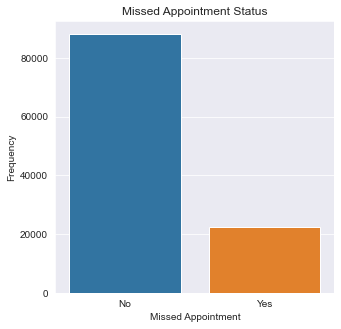

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x = "Missed Appointment", data = df)
plt.title("Missed Appointment Status")
plt.xlabel("Missed Appointment")
plt.ylabel("Frequency");

>* This bar shows that a very large proportion of patients didn't miss their medical appointment.

Since we are interested to know the percentage of those who missed, we'll use a pie chart to show this percentages.

In [25]:
# the percentage of each portion, No and Yes
percentage_prop = round(df["Missed Appointment"].value_counts()/len(df) * 100).to_frame()
percentage_prop

,Missed Appointment
No,80.0
Yes,20.0


To better see this, i'll create a pie chart to visualise this data.

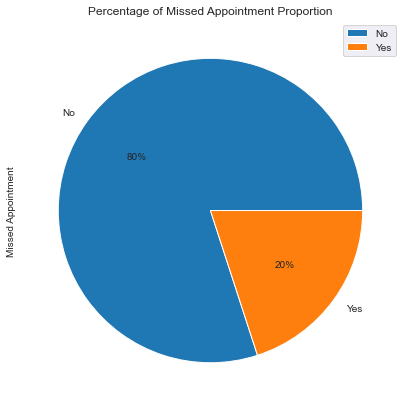

In [26]:
percentage_prop.plot(y = "Missed Appointment", kind="pie", autopct = '%1.0f%%', figsize=(7,7))
plt.title("Percentage of Missed Appointment Proportion");

>* Based on the Data analyzed, about **20%** of patients missed their Medical appointment.

**N.B:** This values were rounded to the nearest whole number and is based on the data provided [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf) on Udacity.

<a id="question_2"></a>
### 2. What are the age group of people who mostly miss their scheduled appointments?

> The age of each patient was recorded and not thier age group.
> To get this i'll group up the ages into differient category of children, Youth, young adult, adult, old according to [Statistics Canada](https://www.statcan.gc.ca/en/concepts/definitions/age2)

In [27]:
Children = "00-14"
Youth = "15-24"
Adult = "25-64"
Seniors = "65 and Above"

bins = pd.IntervalIndex.from_tuples([(0, 14), (15, 24), (25, 64), (64, max(df["Age"]))])
labels = ["children", "Youth", "Adult", "Seniors"]
df["Age_group"] = pd.cut(df["Age"], bins=bins, labels=labels)
df["Age_group"].replace(bins, labels, inplace=True)
df[["Age_group"]].head()

,Age_group
0,Adult
1,Adult
2,Adult
3,children
4,Adult


Having gotten the age group, i'll group this by the No_show feature to answer the question; What are the age group of those who are likely to miss their scheduled appointments

**Table 1**

In [28]:
missed_Age_group = round(df["Missed Appointment"].groupby(df["Age_group"]).value_counts()).unstack()
missed_Age_group

Missed Appointment,No,Yes
Age_group,,
Adult,46257,11268
Seniors,12169,2233
Youth,9581,3218
children,15431,4287


**Chart 1**

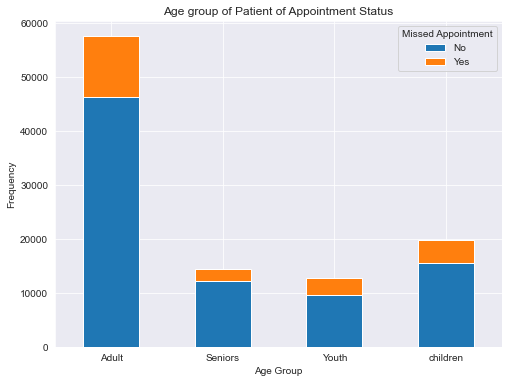

In [29]:
missed_Age_group.plot(kind="bar", stacked = True, figsize = (8, 6))
plt.xticks(rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Age group of Patient of Appointment Status");

* Though this shows that the Adults are the group of people that mostly missses their appointment, it can be misleading since most of the data collected falls within the adult and youth age group based on this [box plot](#age_box_plot).
* To communicate this better i'll use the proportion of each Missed Appointment category instead against the Age groups of Patients.

**Table 2**
<a id="missed_Age_group_prop_tab"></a>

In [30]:
def category_proportion(independent, dependent, data, percentage=False):
    """
    This function gets the proportions of two categorical variables  or feature where one
    variable is seen as the dependent variable and another the independent varable.
    
    Parameters
    ----------
    
    data : Series or DataFrame
    The object for which the method is called.
    independent : label, default None
    dependent : label, default None
    percentage : bool, default False
    
    """
    proportion = (data[f"{dependent}"].groupby(data[f"{independent}"]).value_counts() / \
                  data[[f"{independent}"]].value_counts()).unstack()
    if percentage:
        return proportion * 100
    else:
        return proportion

In [31]:
age_group_prop = category_proportion("Age_group", "Missed Appointment", data=df)
age_group_prop

Missed Appointment,No,Yes
Age_group,,
Adult,0.804120,0.195880
Seniors,0.844952,0.155048
Youth,0.748574,0.251426
children,0.782584,0.217416


In [32]:
# Proportion of those who miss
age_group_prop[["Yes"]]

Missed Appointment,Yes
Age_group,
Adult,0.195880
Seniors,0.155048
Youth,0.251426
children,0.217416


**Chart 2**
<a id="missed_Age_group_prop_chart"></a>

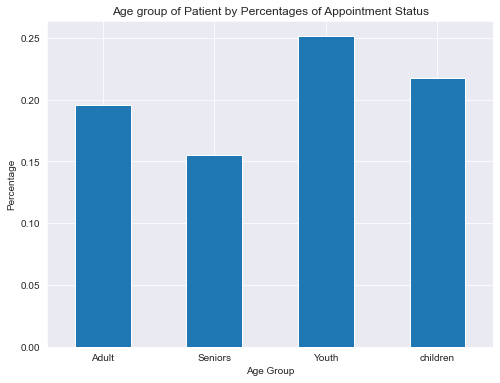

In [33]:
age_group_prop[["Yes"]].plot(kind="bar", figsize = (8, 6), legend=False)
plt.xticks(rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Age group of Patient by Percentages of Appointment Status");

This last [Table](#missed_Age_group_prop_tab) and [Chart](#missed_Age_group_prop_chart) above shows that the **youth** are the group of those that mostly misses their appointment, more investigation would need to be done to know why.

<a id="question_3"></a>
### 3. What day of the week do patient mostly miss their scheduled appointments?

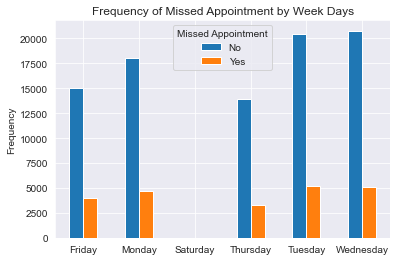

In [34]:
df["Missed Appointment"].groupby(df["AppointmentWeekDay"]).value_counts().unstack().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Frequency of Missed Appointment by Week Days")
plt.xlabel("")
plt.ylabel("Frequency");

In [35]:
week_day = category_proportion("AppointmentWeekDay", "Missed Appointment", data=df)
week_day

Missed Appointment,No,Yes
AppointmentWeekDay,,
Friday,0.787739,0.212261
Monday,0.793519,0.206481
Saturday,0.769231,0.230769
Thursday,0.806459,0.193541
Tuesday,0.799064,0.200936
Wednesday,0.803108,0.196892


In [36]:
week_day[["Yes"]]

Missed Appointment,Yes
AppointmentWeekDay,
Friday,0.212261
Monday,0.206481
Saturday,0.230769
Thursday,0.193541
Tuesday,0.200936
Wednesday,0.196892


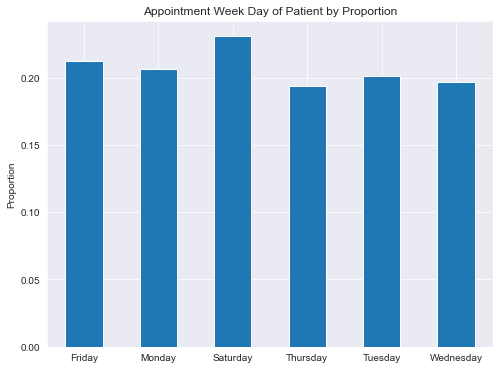

In [37]:
week_day[["Yes"]].plot(kind="bar", stacked = True, figsize = (8, 6), legend=False);
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Proportion")
plt.title("Appointment Week Day of Patient by Proportion");

With the result of this analysis of the given data, it shows that appointments on saturdays are rear and that saturday is the day with higher missed appointment. No wonder saturdays appointment are rear.

More investigation would need to be done to know why this is so. It may be that only few doctors come to work on sataurdays.

<a id="question_4"></a>
### 4. What is the probabily that those that have the brazil Scholarship will miss their appointment?

In [38]:
# Number of those who Missed their medical appointment and those who didn't
df["Missed Appointment"].value_counts()

No     88207
Yes    22319
Name: Missed Appointment, dtype: int64

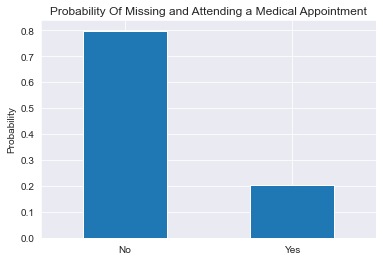

In [39]:
# Probability of missing an appoiontment is 
(df["Missed Appointment"].value_counts() / len(df)).plot(kind="bar", legend=False)
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Probability")
plt.title("Probability Of Missing and Attending a Medical Appointment");

Let create a **Contingency Table** to get this easily

In [40]:
cont_tab = df["Scholarship"].groupby(df["Missed Appointment"]).value_counts().unstack()
cont_tab["Total"] = cont_tab.sum(axis=1)
cont_tab
contingency_table = pd.concat([cont_tab, cont_tab.sum(axis=0).to_frame(name="Total").T])
contingency_table.index.name = "Missed Appointment"
contingency_table

Scholarship,No,Yes,Total
Missed Appointment,,,
No,79924,8283,88207
Yes,19741,2578,22319
Total,99665,10861,110526


**Conditional Probability** 

$Pr(M \mid S)$ = $\frac{𝑃r(M∩S)}{𝑃r(S)}$ 

>$M$ = Event that a patient will miss an appointment. \
>$S$ = Event that a patient has a brazil medical Scholarship.

$Pr(M∩S)$ = $\frac{2578}{110527} = 0.02332461751427253$

$Pr(S)$ = $\frac{10861}{110527} = 0.09826558216544373$

$Pr(M \mid S)$ = 0.237


* **There is about 24% Probability of those with a medical scholarship to miss their sheduled Appointment.**

<a id="question_5"></a>
### 5. How many of those with Hipertension miss their scheduled appointments?

In [41]:
# Frequency
hiper_missed = df["Hipertension"].groupby(df["Missed Appointment"]).value_counts().unstack()
hiper_missed

Hipertension,No,Yes
Missed Appointment,,
No,70178,18029
Yes,18547,3772


In [42]:
# percentage
round(hiper_missed / len(df) * 100)

Hipertension,No,Yes
Missed Appointment,,
No,63.0,16.0
Yes,17.0,3.0


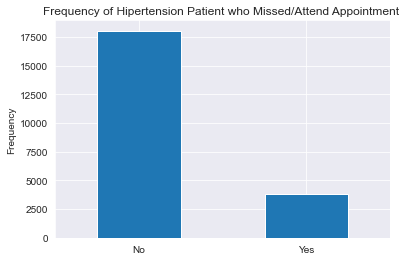

In [43]:
hiper_missed["Yes"].plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Frequency of Hipertension Patient who Missed/Attend Appointment ");

3772 Hipertension Patients Missed their sheduled Appointment, which is about 3%.
This is quite low and also suggest that most of patients with the medical scholarship tend not to miss their appointment. 

<a id="question_6"></a>
### 6. How many of those with Diabetes miss their scheduled appointments?

In [44]:
# Frequency
diab_missed = df["Diabetes"].groupby(df["Missed Appointment"]).value_counts().unstack()
diab_missed

Diabetes,No,Yes
Missed Appointment,,
No,81694,6513
Yes,20889,1430


In [45]:
# percentage
round(diab_missed / len(df) * 100)

Diabetes,No,Yes
Missed Appointment,,
No,74.0,6.0
Yes,19.0,1.0


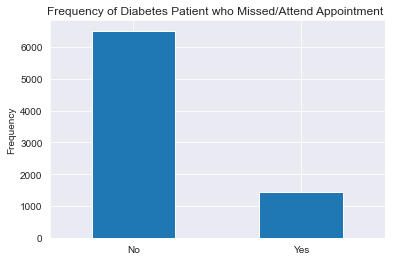

In [46]:
diab_missed["Yes"].plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Frequency of Diabetes Patient who Missed/Attend Appointment ");

1430 Diabetes Patients Missed their sheduled Appointment, which is about 1%.
This is quite low and also suggest that most of patients with Diabetes tend not to miss their appointment. 

<a id="question_7"></a>
### 7. How many of those with Alcoholism miss their scheduled appointments?

In [47]:
# Frequency
alcoh_missed = df["Alcoholism"].groupby(df["Missed Appointment"]).value_counts().unstack()
alcoh_missed

Alcoholism,No,Yes
Missed Appointment,,
No,85524,2683
Yes,21642,677


In [48]:
# percentage
round(alcoh_missed / len(df) * 100)

Alcoholism,No,Yes
Missed Appointment,,
No,77.0,2.0
Yes,20.0,1.0


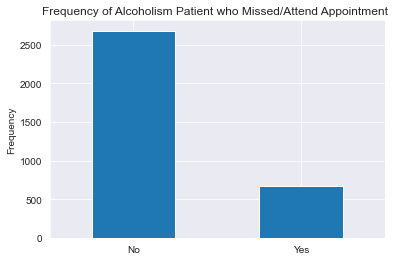

In [49]:
alcoh_missed["Yes"].plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Frequency of Alcoholism Patient who Missed/Attend Appointment ");

677 Alcoholism Patients Missed their sheduled Appointment, which is about 1%.
This is quite low and also suggest that most of who are Alcoholism patients tend not to miss their appointment. 

<a id="question_8"></a>
### 8. What is the chance of those who recieved an SMS reminder to miss their scheduled appointments?

In [50]:
cont_tab = df["SMS_received"].groupby(df["Missed Appointment"]).value_counts().unstack()
cont_tab["Total"] = cont_tab.sum(axis=1)
cont_tab
contingency_table = pd.concat([cont_tab, cont_tab.sum(axis=0).to_frame(name="Total").T])
contingency_table.index.name = "Missed Appointment"
contingency_table

SMS_received,No,Yes,Total
Missed Appointment,,,
No,62509,25698,88207
Yes,12535,9784,22319
Total,75044,35482,110526


**Conditional Probability** 

$Pr(M \mid S)$ = $\frac{𝑃r(M∩S)}{𝑃r(S)}$ 

>$M$ = Event that a patient will miss an appointment. \
>$S$ = Event that a patient Received an SMS.

$Pr(M∩S)$ = $\frac{9784}{110527} = 0.08852135677255331$

$Pr(S)$ = $\frac{35482}{110527} = 0.32102563174608917$

$Pr(M \mid S)$ = 0.2757


* **There is just about 28% chance of those who receieve an SMS to miss their sheduled Appointment.**
This does not mean that SMS reminded helps to increase of worsen the rate at whick patient miss their appointment.

<a id='conclusions'></a>
## Conclusions



The conclusion from this analysis based on the questions asked in the beginning include:
1. Based on the data analysed, 20% of People who shedule an appointment at the hospital don't show up.
2. The youth (Age:14 -24) are the most set of people that misses their Medical Appointment.
3. Saturday appointments are rear and it is the day that patients mostly miss their Medical Appointment.
4. There is 24% Probability of those who have access to free Medical Care to miss their Medical Appointment.
5. Only 3% of Hipertension Patients who shedule an appointment at the hospital don't show up.
6. Only 1% of Diabetes Patients who shedule an appointment at the hospital don't show up.
7. Only 1% of Alcoholism Patients who shedule an appointment at the hospital don't show up.
8. There is just about 28% chance of those who receieve an SMS to miss their sheduled Appointment. This does not mean that SMS reminded helps to increase of worsen the rate at whick patient miss their appointment.


### Limitation
1. All anaysis conclusion are based on the data collected from [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).
2. Data were only collected from patient in Brazil and outcome could differ in other countries.
3. Only data from 81 Hospitals in brazil was used. 
4. The Result of the analysis tentative since the data used are limited.